In [3]:
from __future__ import print_function, division
from builtins import range

In [6]:
# from future.utils import iteritems
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [7]:
pip install wordcloud


     ---------------------------------------- 0.0/151.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/151.4 kB ? eta -:--:--
     ------- ----------------------------- 30.7/151.4 kB 435.7 kB/s eta 0:00:01
     ------- ----------------------------- 30.7/151.4 kB 435.7 kB/s eta 0:00:01
     ---------- -------------------------- 41.0/151.4 kB 195.7 kB/s eta 0:00:01
     --------------- --------------------- 61.4/151.4 kB 252.2 kB/s eta 0:00:01
     -------------------- ---------------- 81.9/151.4 kB 269.5 kB/s eta 0:00:01
     ---------------------- -------------- 92.2/151.4 kB 261.7 kB/s eta 0:00:01
     ----------------------------- ------ 122.9/151.4 kB 312.9 kB/s eta 0:00:01
     ----------------------------- ------ 122.9/151.4 kB 312.9 kB/s eta 0:00:01
     ----------------------------- ------ 122.9/151.4 kB 312.9 kB/s eta 0:00:01
     ------------------------------------ 151.4/151.4 kB 265.4 kB/s eta 0:00:00


In [8]:
from wordcloud import WordCloud

In [9]:
df = pd.read_csv("spam.csv", encoding = 'ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [11]:
df = df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.columns = ['labels', 'data']
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
df['b_labels'] = df['labels'].map({'ham':0 , 'spam':1})
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [18]:
Y = df['b_labels'].to_numpy()

In [21]:
Y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [23]:
tfidf = TfidfVectorizer(decode_error='ignore')
X_1 = tfidf.fit_transform(df['data'])

In [24]:
count_vectorizer = CountVectorizer(decode_error='ignore')
X = count_vectorizer.fit_transform(df['data'])

In [25]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y, test_size=0.20)
Xtrain_1, Xtest_1, Ytrain_1, Ytest_1 = train_test_split(X_1,Y, test_size=0.20)

In [26]:
model = MultinomialNB()
model.fit(Xtrain, Ytrain)
print("train score: ", model.score(Xtrain, Ytrain))
print("test score: ", model.score(Xtest, Ytest))

train score:  0.9937177473636976
test score:  0.9865470852017937


In [27]:
model = MultinomialNB()
model.fit(Xtrain_1, Ytrain_1)
print("train score: ", model.score(Xtrain_1, Ytrain_1))
print("test score: ", model.score(Xtest_1, Ytest_1))

train score:  0.97083239847431
test score:  0.9605381165919282


In [28]:
from matplotlib import pyplot as plt

In [29]:
#visualize the data
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg + ' '
    wordcloud = WordCloud(width = 600, height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

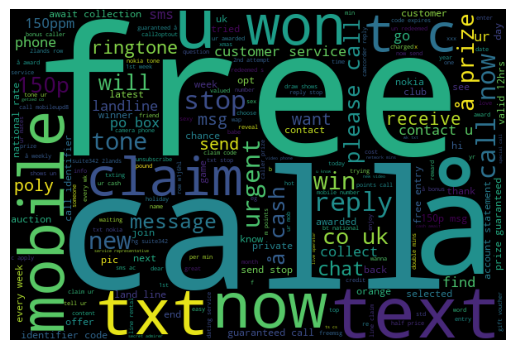

In [30]:
visualize('spam')

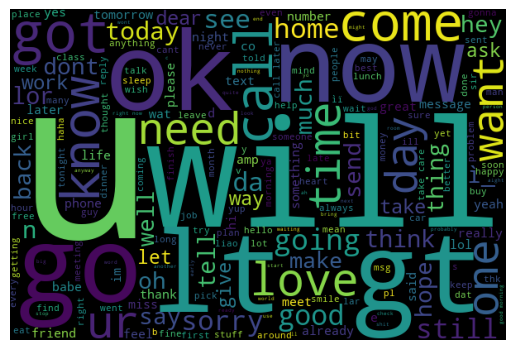

In [31]:
visualize('ham')

In [32]:
df['predictions'] = model.predict(X)

In [33]:
df.head()

,labels,data,b_labels,predictions
0,ham,"Go until jurong point, crazy.. Available only ...",0,0
1,ham,Ok lar... Joking wif u oni...,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,1
3,ham,U dun say so early hor... U c already then say...,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,0


In [36]:
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print (msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
FreeMsg Why haven't you replied to my text? I'm Randy, sexy, female and live local. Luv to hear from u. Netcollex Ltd 08700621170150p per msg reply Stop to end
BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu
Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES


In [ ]:
not_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in not_spam:
    print (msg)